In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pubg_dataset- Sheet.csv")

In [3]:
df.head(10)

,Groupid,Id,Matchid,Matchtype,Assists,Boosts,Damagedealt,Headshotkills,Heals,Is Duo,...,Swimdistance,Teamkills,Vehicledestroys,Walkdistance,Weaponsacquired,Winplaceperc,Ln Damage Dealt,Ln Match Kill Rank,Ln Win Place Perc,Ln Win Place Perc.1
0,32dc8ae9572956,4bda15647cb16c,b262d5270ee227,solo,0,0,53.32,0,0,0,...,0.0,0,0,603.60,3,0.6354,3.976311,3.970292,-0.453501,-0.453501
1,559ec1194e4a7d,bc952a1b1e62d7,4b8d740dda9ca9,squad,1,3,427.5,0,1,0,...,0.0,0,0,2716.00,6,0.9615,6.057954,2.397895,-0.039261,-0.039261
2,7d4155b927c232,eb1cc8c533c91f,a3cb2f821cebee,duo,0,3,393.1,1,5,1,...,0.0,0,0,2107.00,3,0.8511,5.974064,2.484907,-0.161226,-0.161226
3,8e4fcc73aa9046,3d621777a0b77f,9e9a7fc4f76c37,squad,0,0,142.9,1,0,0,...,0.0,0,0,161.30,2,0.0769,4.962145,3.218876,-2.565249,-2.565249
4,7f802b015bf341,5ab218d8cd339f,760c1a85499e78,duo,0,0,61.64,0,3,1,...,0.0,1,0,455.80,4,0.3125,4.121311,3.332205,-1.163151,-1.163151
5,090385f89aff66,f116ee2a9632e8,8c57d39a1ea076,squad,1,0,112.8,0,0,0,...,0.0,0,0,2992.00,4,0.8519,4.725616,3.784190,-0.160286,-0.160286
6,565d6bd007f028,5eb5c7dfa6b24d,93fd4b75702001,solo,0,4,373.4,0,3,0,...,0.0,0,0,2065.00,2,0.9032,5.922650,2.564949,-0.101811,-0.101811
7,797b0f6a5e8c0d,9f6fa14e667621,bb3c21d64f7c6e,squad,0,7,"1,015",4,6,0,...,0.0,0,0,3493.00,10,1.0000,6.922644,0.000000,0.000000,0.000000
8,8e2e0c2e5514f5,57de21662e7d33,b08bf9718090ba,duo,0,0,18,0,0,1,...,0.0,0,0,26.15,0,0.0625,2.890372,4.499810,-2.772589,-2.772589
9,497e9dbab1a801,cb8e9f4afbdc12,4fee6aa280ab24,squad,0,6,36.44,0,0,0,...,0.0,0,0,1617.00,7,0.9310,3.595667,3.610918,-0.071496,-0.071496


**Checking missing value**

In [8]:
df.isnull().sum()

Groupid                0
Id                     0
Matchid                0
Matchtype              0
Assists                0
Boosts                 0
Damagedealt            0
Headshotkills          0
Heals                  0
Is Duo                 0
Is Squad               0
Kills                  0
Killstreaks            0
Longestkill            0
Matchduration          0
Matchkillrank          0
Matchtypeint           0
Maxplace               0
Numenemiesknocked      0
Numgroups              0
Overallkillrank        0
Overallwinbasedrank    0
Revives                0
Ridedistance           0
Swimdistance           0
Teamkills              0
Vehicledestroys        0
Walkdistance           0
Weaponsacquired        0
Winplaceperc           0
Ln Damage Dealt        0
Ln Match Kill Rank     0
Ln Win Place Perc      0
Ln Win Place Perc.1    0
dtype: int64

**Checking and Removing Outlier**

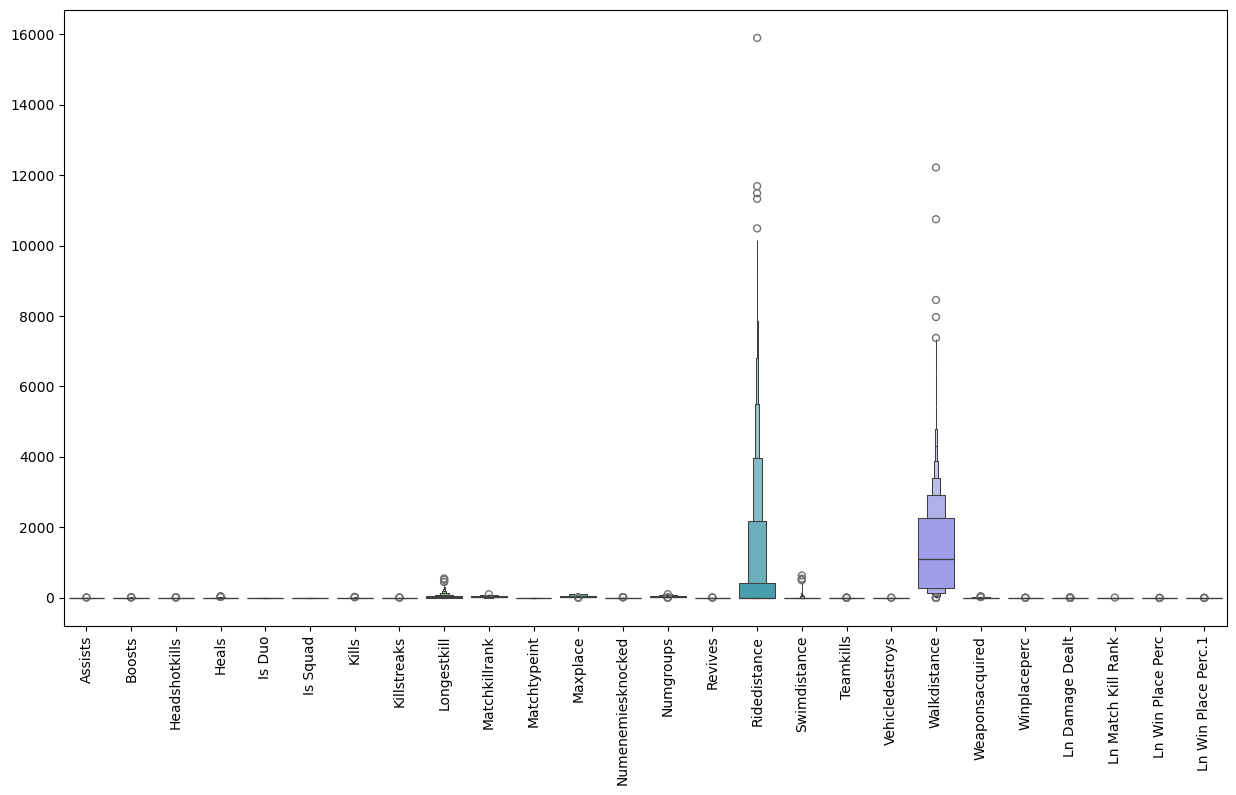

In [25]:
fig = plt.figure(figsize=(15,8))

sns.boxenplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import numpy as np

# Select numeric columns only
iqr_df = df.select_dtypes(include=[np.number])

# Calculating IQR
Q1 = iqr_df.quantile(0.25)
Q3 = iqr_df.quantile(0.75)
IQR = Q3 - Q1

# Now, we can safely calculate the outliers
outliers = ((iqr_df < (Q1 - 1.5 * IQR)) | (iqr_df > (Q3 + 1.5 * IQR))).any(axis=1)

# And then we can create a new DataFrame excluding these outliers
df_without_outliers = df[~outliers].copy()

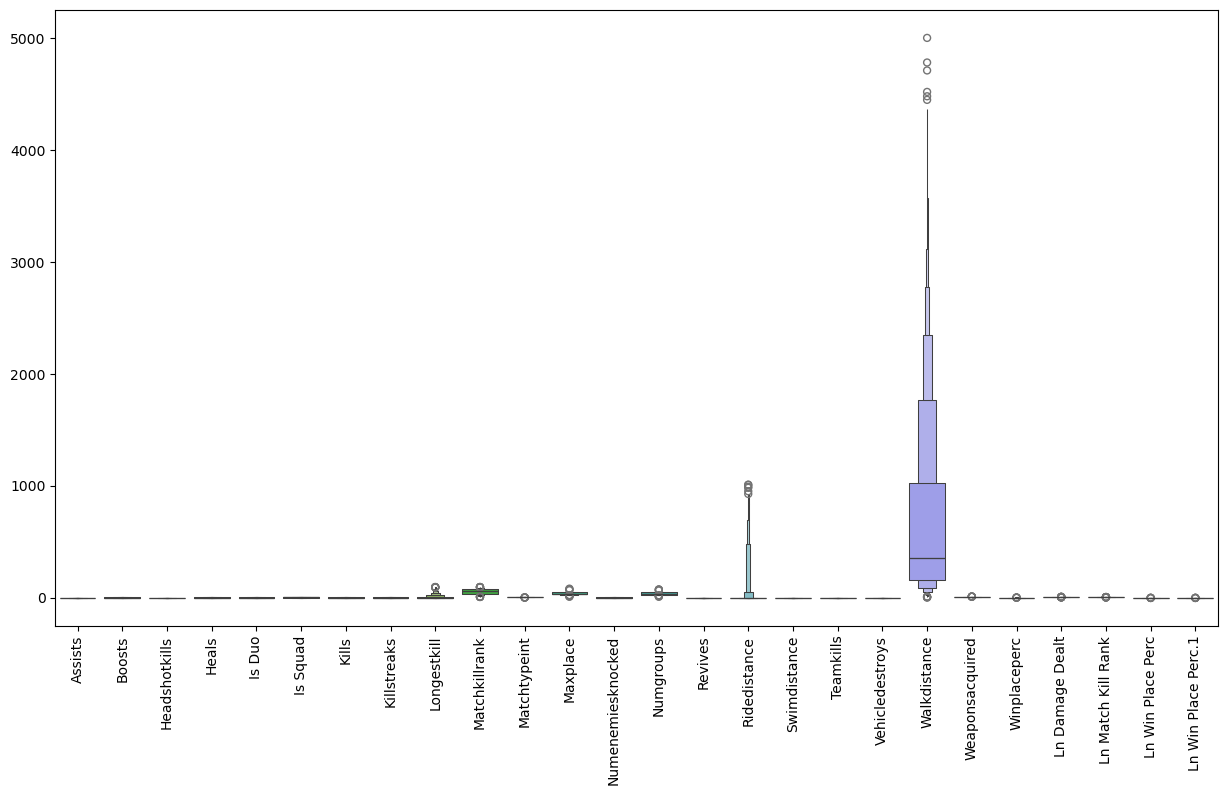

In [ ]:
fig = plt.figure(figsize=(15,8))

sns.boxenplot(data=df_without_outliers)
plt.xticks(rotation=90)
plt.show()

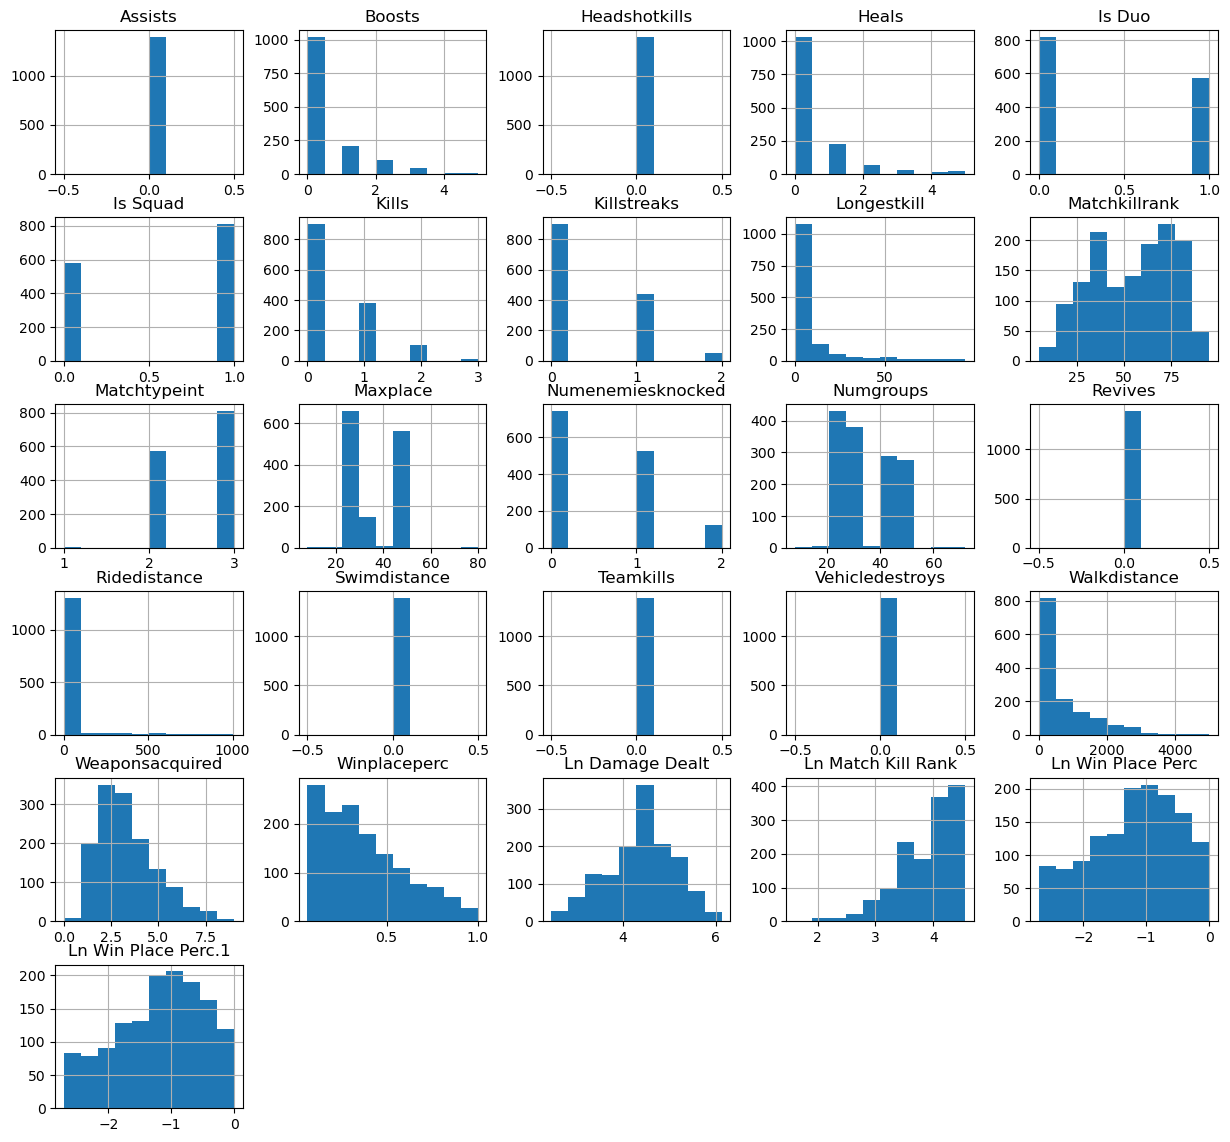

In [47]:
df_without_outliers.hist(figsize=(15, 14))
plt.show()

In [48]:
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 13 to 4759
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Groupid              1392 non-null   object 
 1   Id                   1392 non-null   object 
 2   Matchid              1392 non-null   object 
 3   Matchtype            1392 non-null   object 
 4   Assists              1392 non-null   int64  
 5   Boosts               1392 non-null   int64  
 6   Damagedealt          1392 non-null   object 
 7   Headshotkills        1392 non-null   int64  
 8   Heals                1392 non-null   int64  
 9   Is Duo               1392 non-null   int64  
 10  Is Squad             1392 non-null   int64  
 11  Kills                1392 non-null   int64  
 12  Killstreaks          1392 non-null   int64  
 13  Longestkill          1392 non-null   float64
 14  Matchduration        1392 non-null   object 
 15  Matchkillrank        1392 non-null   int64

In [64]:
df_without_outliers['Boosts']

13      0
19      0
23      1
26      0
32      0
       ..
4717    4
4756    0
4757    0
4758    1
4759    1
Name: Boosts, Length: 1392, dtype: int64

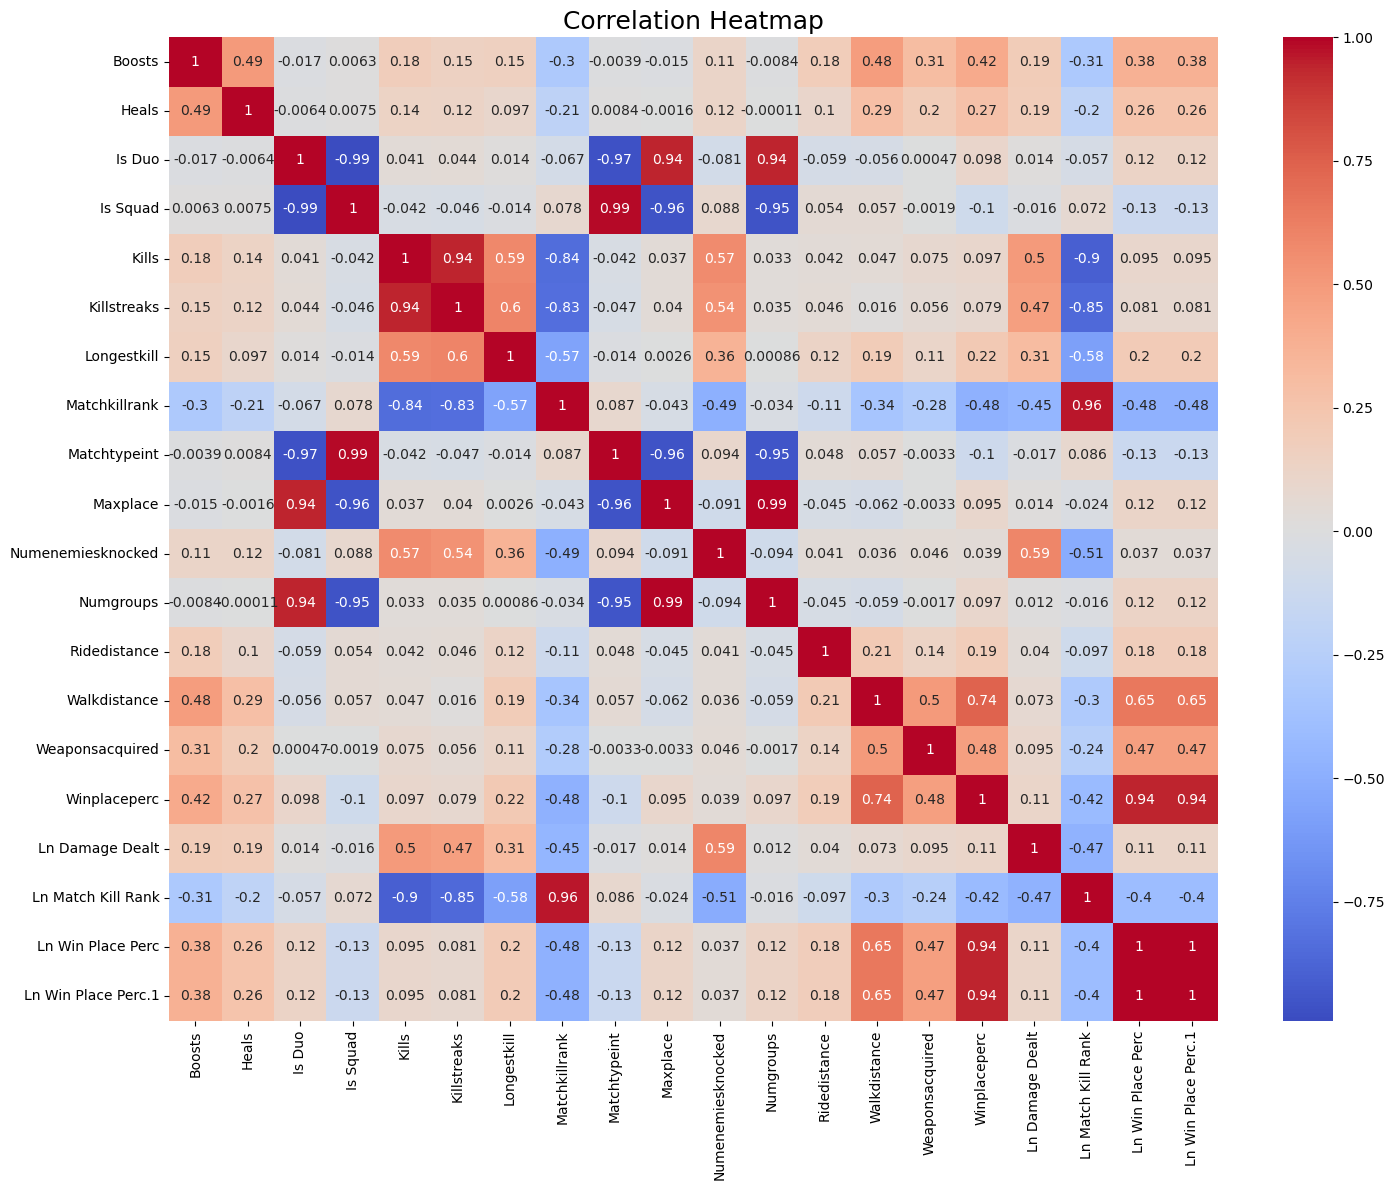

In [99]:
# To calculate correlation matrix in df_without_outliers
# first droping the columns with constant values
df_without_outliers = df_without_outliers.loc[:, df_without_outliers.nunique() > 1]

# correlation matrix
corr = df_without_outliers.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size':'10'})

# Add titles and labels for clarity
plt.title('Correlation Heatmap', fontsize=18)

plt.tight_layout() 
plt.show()

In [101]:
threshold = 0.85

# Filter correlations above the threshold
high_corr_pairs = corr.where((corr.abs() > threshold) & (corr.abs() < 1.0))

stacked_pairs = high_corr_pairs.stack()

# Reset index to create a DataFrame of pairs
pairs_df = stacked_pairs.reset_index()
pairs_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Ensure unique pairs by enforcing a sorting order
unique_pairs = pairs_df[pairs_df['Feature 1'] < pairs_df['Feature 2']]

print(unique_pairs)

              Feature 1           Feature 2  Correlation
0                Is Duo            Is Squad    -0.991163
1                Is Duo        Matchtypeint    -0.965513
2                Is Duo            Maxplace     0.944495
3                Is Duo           Numgroups     0.938240
5              Is Squad        Matchtypeint     0.991516
6              Is Squad            Maxplace    -0.959177
7              Is Squad           Numgroups    -0.952368
8                 Kills         Killstreaks     0.943070
9                 Kills  Ln Match Kill Rank    -0.898589
11          Killstreaks  Ln Match Kill Rank    -0.853002
15         Matchtypeint            Maxplace    -0.957121
16         Matchtypeint           Numgroups    -0.949886
20             Maxplace           Numgroups     0.993000
29   Ln Match Kill Rank       Matchkillrank     0.964914
30    Ln Win Place Perc        Winplaceperc     0.943970
31  Ln Win Place Perc.1        Winplaceperc     0.943970


**Selecting 5 features**

In [295]:
# X = df_without_outliers[['Is Duo', 'Is Squad', 'Kills', 'Killstreaks', 'Matchtypeint']]
features = ['Is Duo', 'Killstreaks','Maxplace', 'Matchkillrank', 'Winplaceperc']
X = df_without_outliers[features].copy()
X = X.copy()

**Standarizing the dataframe**

In [296]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Determining the number of clusters**

c:\Users\aarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\aarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\aarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\aarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

<Figure size 1000x800 with 0 Axes>

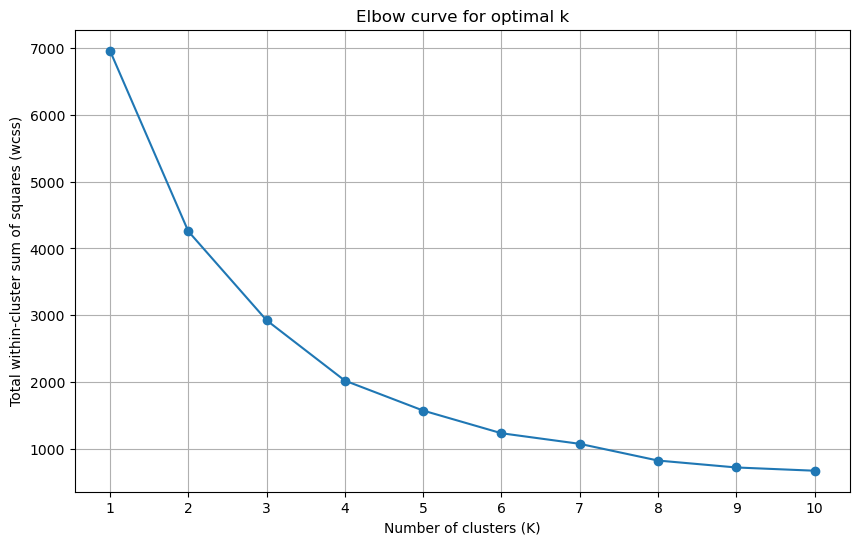

In [297]:
from sklearn.cluster import KMeans

wcss = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker = 'o', linestyle = '-')
plt.title('Elbow curve for optimal k')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total within-cluster sum of squares (wcss)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


The x-axis represents the number of clusters, while the y-axis shows the inertia, which is the within-cluster sum of squares criterion — essentially a measure of how internally coherent the clusters are.

**Applying K-means clustering**

In [290]:
from sklearn.cluster import KMeans

optimal_k = 3

kmean = KMeans(n_clusters=optimal_k, random_state=42)

clusters = kmean.fit_predict(X_scaled)

c:\Users\aarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [298]:
X['Cluster'] = clusters
print(X.groupby('Cluster').mean())

           Is Duo  Killstreaks   Maxplace  Matchkillrank  Winplaceperc
Cluster                                                               
0        0.992634     0.331492  48.031308      54.760589      0.400683
1        0.001873     0.000000  28.220974      68.816479      0.338953
2        0.111111     1.165079  30.025397      28.907937      0.397328


In [299]:
# Fit KMeans with optimal K

kmeans.fit(X_scaled)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_


# Calculate SSE for each cluster
sse_per_cluster = []
for i in range(optimal_k):
    cluster_points = X_scaled[cluster_labels == i]
    
    cluster_sse = np.sum((cluster_points - centroids[i]) ** 2)

    sse_per_cluster.append(cluster_sse)
    

# Create a DataFrame to store size and SSE for each cluster
cluster_info = pd.DataFrame({
    'Cluster': range(optimal_k),
    'Size': [np.sum(cluster_labels == i) for i in range(optimal_k)],
    'SSE': sse_per_cluster
})

print(cluster_info)

   Cluster  Size        SSE
0        0    76  88.625296
1        1   193  50.530912
2        2   232  88.825047


c:\Users\aarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


c:\Users\aarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


The average silhouette score is : 0.47796730300435813


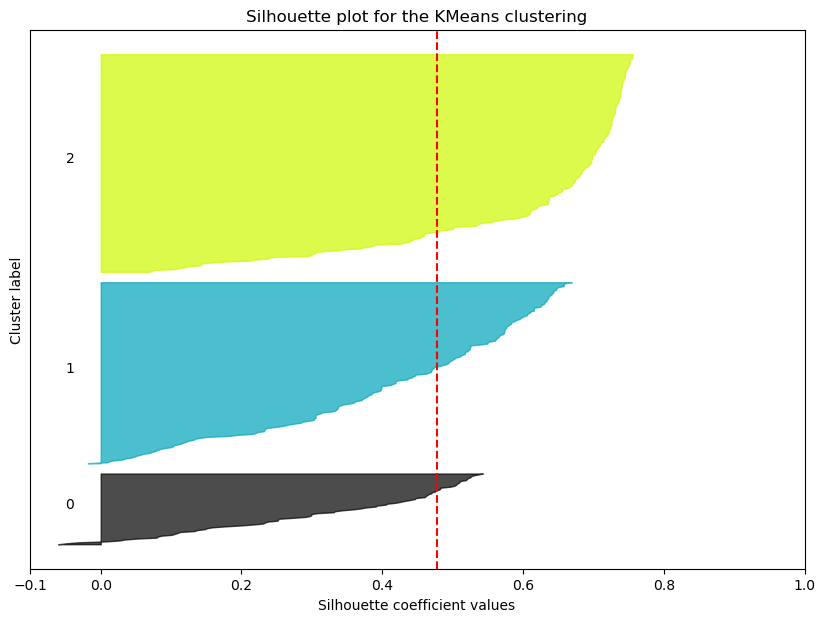

In [300]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("The average silhouette score is :", silhouette_avg)

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create a subplot with 1 row and 1 column
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

y_lower = 10
for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette plot for the KMeans clustering")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


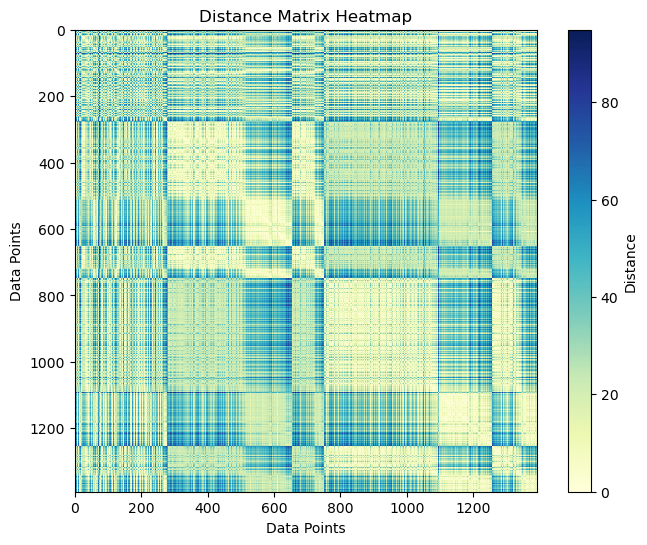

In [301]:
from sklearn.metrics import pairwise_distances

# Calculate pairwise distances between data points
distances = pairwise_distances(X, metric='euclidean')  

# Plot distance matrix as a heatmap with lighter colors
plt.figure(figsize=(8, 6))
plt.imshow(distances, cmap='YlGnBu', interpolation='nearest')  
plt.colorbar(label='Distance')
plt.title('Distance Matrix Heatmap')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()

**Introducing PCA for feature reduction**

In [302]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
# X_features = X_numeric.drop(columns=['Cluster'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.49115598,  0.40959139],
       [ 2.52624909,  0.01434754],
       [-1.20763911,  0.53737891],
       ...,
       [ 1.23972885,  2.78259488],
       [ 0.90025425,  2.55729123],
       [ 1.62225218,  2.97754643]])

**t-SNE Visualization**

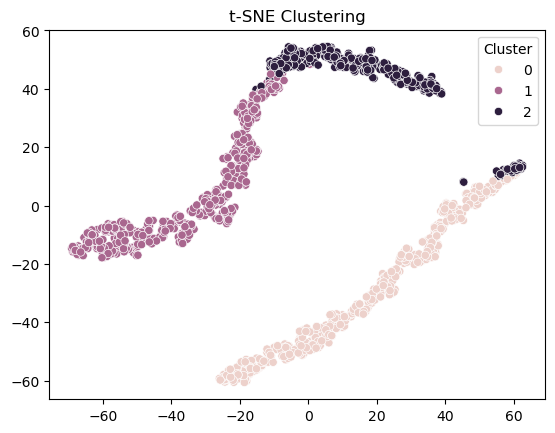

In [303]:
# t-SNE for visualization in a 2D space
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)
X_tsne = tsne.fit_transform(X_pca)
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=X['Cluster'])
plt.title('t-SNE Clustering')
plt.show()

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

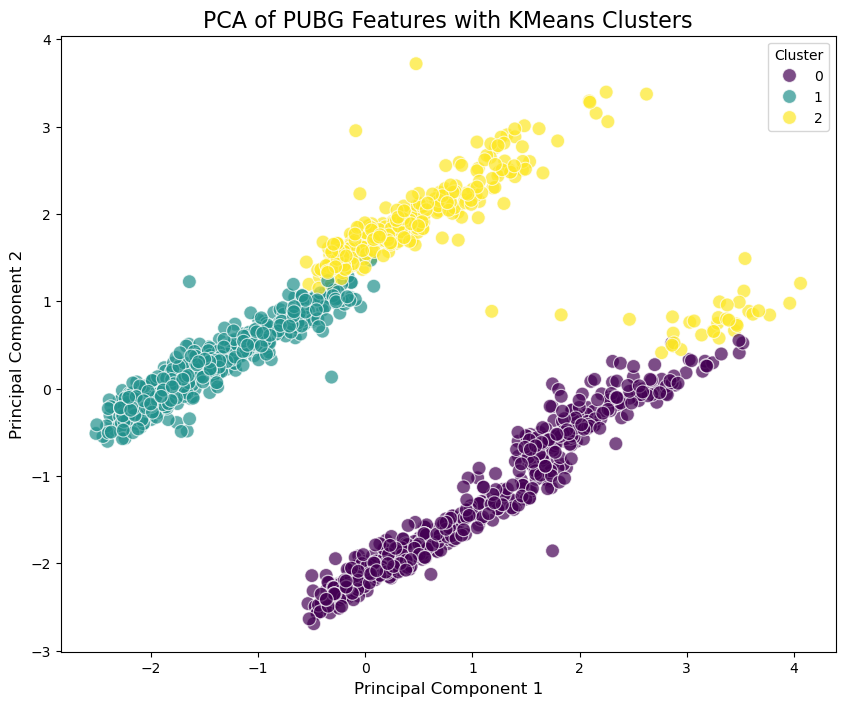

In [306]:
# Visualize the data after PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('PCA of PUBG Features with KMeans Clusters', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()